In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv('melb_data.csv')
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
#check NA value
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### 1. Untuk feature/column Landsize & Price, hitung dan beri insight terkait :
* Central Tendency
* Dispersion
* Distribution

In [37]:
#create function for central tendency, dispersion, and distribution plot
def central_tendency(df,var):
    print(var + ' mean :', df[var].mean())
    print(var + ' median :', df[var].median())
    print(var + ' mode :', df[var].mode()[0])

def dispersion(df,var):
    print(var + ' Range:', df[var].max()-df[var].min())
    print('')
    print(var + ' Std:', df[var].std())
    print('')
    print(var + ' Quartile:\n'+str(df[var].quantile([0.25,0.5,0.75,1])))
    print('')
    print(var + ' IQR:', df[var].quantile(0.75)-df[var].quantile(0.25))

def dist_plot(df, var, bin) :
    plt.style.use('seaborn')
    sns.displot(df[var], bins=bin)
    plt.title(var +' Histogram')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.axvline(df[var].mean(), color = 'k', linestyle='dashed',label='mean')
    plt.axvline(df[var].median(), color = 'b', linestyle='dashdot',label='median')
    plt.axvline(df[var].mode()[0], color = 'c', linestyle='dotted',label='mode')
    plt.legend()
    plt.show()


1. Landsize (central tendency, dispersion, distribution)

In [12]:
#central tendency
central_tendency(df,'Landsize')

Landsize mean : 558.4161266568483
Landsize median : 440.0
Landsize mode : 0.0


In [16]:
#dispersion
dispersion(df,'Landsize')

Landsize Range: 433014.0

Landsize Std: 3990.6692411090316

Landsize Quartile:
0.25       177.0
0.50       440.0
0.75       651.0
1.00    433014.0
Name: Landsize, dtype: float64

Landsize IQR: 474.0


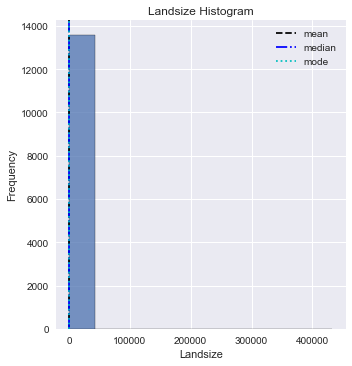

In [38]:
#distribution
dist_plot(df, 'Landsize', 10)

Gap antara q3 dan q4 yang besar mengindikasikan data outlier sehingga persebaran data tidak terlihat. Cleaning data outlier terlebih dahulu

1. Price (central tendency, dispersion, distribution)

In [39]:
#central tendency
central_tendency(df,'Price')

Price mean : 1075684.079455081
Price median : 903000.0
Price mode : 1100000.0


In [40]:
#dispersion
dispersion(df,'Price')

Price Range: 8915000.0

Price Std: 639310.724296018

Price Quartile:
0.25     650000.0
0.50     903000.0
0.75    1330000.0
1.00    9000000.0
Name: Price, dtype: float64

Price IQR: 680000.0


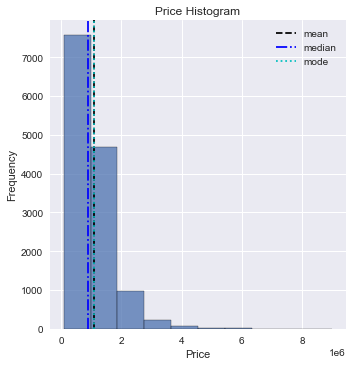

In [41]:
#distribution
dist_plot(df, 'Price', 10)

Distribusi price adalah right skew, yang mengindikasikan banyaknya jumlah rumah yang berharga rendah di dataset.

### 2. Carilah data outlier dalam bentuk plot yang tepat untuk feature YearBuilt. Jelaskan insightnya

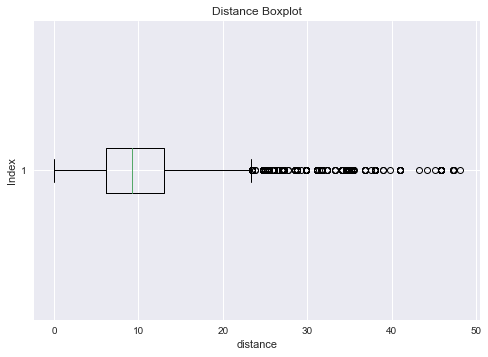

In [45]:
#finding outlier on Distance
plt.boxplot(df.Distance, vert=False)
plt.title('Distance Boxplot')
plt.xlabel('distance')
plt.ylabel('Index')
plt.show()

In [49]:
q3 = df.Distance.quantile(0.75)
q1 = df.Distance.quantile(0.25)
iqr = q3 - q1
outlier_low = q1 - 1.5*iqr
outlier_upp = q3 + 1.5*iqr
df.Distance[(df.Distance < outlier_low) | (df.Distance > outlier_upp)].shape

(411,)

Terdapat 411 data outlier pada distance, yang nilainya jauh lebih besar

### 3. Tampilkan distribusi dalam bentuk plot yang tepat untuk kolom YearBuilt. Jelaskan insightnya

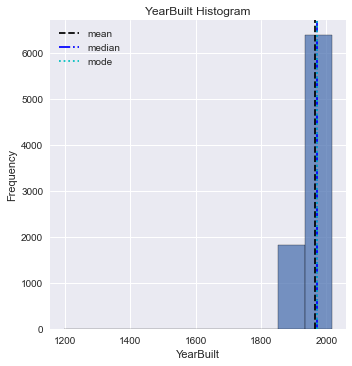

In [50]:
dist_plot(df,'YearBuilt', 10)

Berdasarkan histogram diatas, dapat dilihat bahwa YearBuilt berdistribusi left skew, yang mengindikasikan rumah yang terdapat di dataset lebih banyak dibangun pada era modern

### 4. Tampilkan perkembangan rata2 Price rumah berdasarkan Year. Jelaskan insightnya.

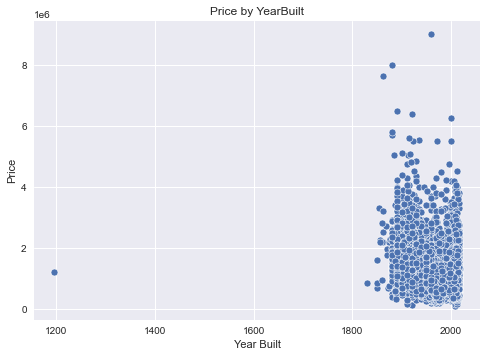

In [54]:
plt.style.use('seaborn')
sns.scatterplot(x='YearBuilt', y='Price', data=df)
plt.title('Price by YearBuilt')
plt.xlabel('Year Built')
plt.show()



Berdasarkan grafik di atas, dapat dilihat bahwa tahun pembangunan rumah cenderung tidak mempengaruhi harga rumah tersebut

### 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tinggi pada Price? Jelaskan metode korelasi yang digunakan serta insight untuk perusahaan

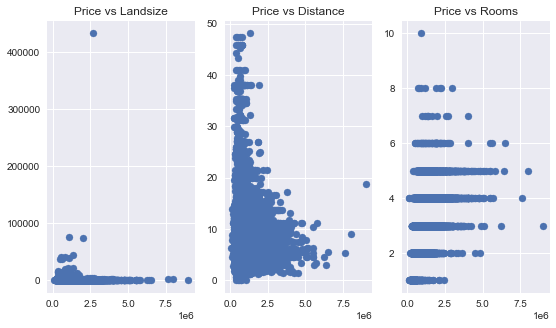

In [55]:
fig,ax = plt.subplots(1,3, figsize=(9,5))
ax[0].scatter(df.Price,df.Landsize)
ax[0].set_title('Price vs Landsize')
ax[1].scatter(df.Price, df.Distance)
ax[1].set_title('Price vs Distance')
ax[2].scatter(df.Price, df.Rooms)
ax[2].set_title('Price vs Rooms')
plt.show()

Karena variable landsize dan distance merupakan data continues, maka perhitungan korelasi akan menggunakan metode pearson, sedangkan price vs rooms akan menggunakan metode spearman karena data rooms adalah ordinal

In [58]:
#pearson
df[['Price','Landsize', 'Distance']].corr(method='pearson')

Price  Landsize  Distance
Price     1.000000  0.037507 -0.162522
Landsize  0.037507  1.000000  0.025004
Distance -0.162522  0.025004  1.000000

In [59]:
#spearman
df[['Price', 'Rooms']].corr(method='spearman')

Price     Rooms
Price  1.000000  0.539886
Rooms  0.539886  1.000000

Berdasarkan perhitungan korelasi tersebut, dapat dilihat bahwa variable yang berkolerasi paling besar dengan price adalah rooms

### 6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah: 
* Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
* Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
* Metode penjualan properti (Method) yang paling sering dilakukan!

In [97]:
df_price_high = df[df.Price > df.Price.mean()]
df_price_high.groupby('Regionname').mean()

Rooms         Price   Distance     Postcode  \
Regionname                                                                   
Eastern Metropolitan        3.773900  1.497067e+06  13.297420  3113.984825   
Eastern Victoria            3.000000  1.085000e+06  34.600000  3795.000000   
Northern Metropolitan       3.118861  1.474489e+06   4.844303  3068.900786   
Northern Victoria           5.000000  1.355000e+06  48.100000  3438.000000   
South-Eastern Metropolitan  3.846847  1.430745e+06  19.999099  3182.234234   
Southern Metropolitan       3.423598  1.872069e+06   9.043459  3155.949066   
Western Metropolitan        3.541229  1.438084e+06   7.918591  3028.797601   

                            Bedroom2  Bathroom       Car      Landsize  \
Regionname                                                               
Eastern Metropolitan        3.749621  1.963581  2.003040    775.796662   
Eastern Victoria            3.000000  2.000000  2.000000  76000.000000   
Northern Metropolitan       3.078585  1.544204  1.415920    821.175835   
Northern Victoria           5.000000  3.000000  5.000000  44500.000000   
South-Eastern Metropolitan  3.846847  2.000000  2.333333    748.333333   
Southern Metropolitan       3.384390  1.917186  1.862107    577.490289   
Western Metropolitan        3.475262  1.835082  1.962406    547.607196   

                            BuildingArea    YearBuilt  Lattitude  Longtitude  \
Regionname                                                                     
Eastern Metropolitan          227.337706  1964.604457 -37.798026  145.126134   
Eastern Victoria                     NaN          NaN -37.847390  145.470520   
Northern Metropolitan         150.887414  1931.003425 -37.778821  144.982687   
Northern Victoria           44515.000000          NaN -37.453920  144.588640   
South-Eastern Metropolitan    219.134615  1975.775862 -37.965783  145.123274   
Southern Metropolitan         198.795449  1949.668727 -37.865585  145.038510   
Western Metropolitan          193.656298  1948.772397 -37.786785  144.895739   

                            Propertycount  
Regionname                                 
Eastern Metropolitan          6604.088012  
Eastern Victoria               457.000000  
Northern Metropolitan         8722.156189  
Northern Victoria              849.000000  
South-Eastern Metropolitan    5250.918919  
Southern Metropolitan         7341.267864  
Western Metropolitan          5527.952024

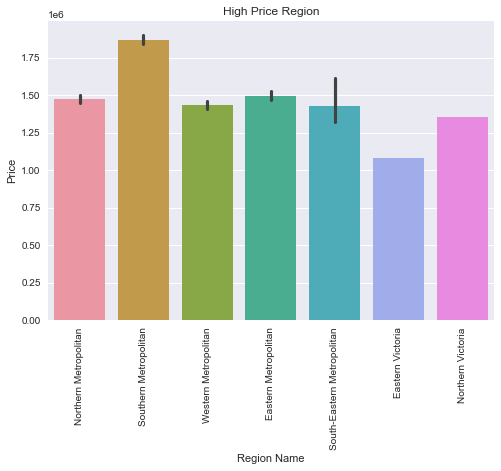

In [67]:
sns.barplot(x='Regionname', y='Price', data=df_price_high)
plt.title('High Price Region')
plt.xlabel('Region Name')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()

#### 5 CouncilArea yang memiliki rata2 harga rumah tinggi

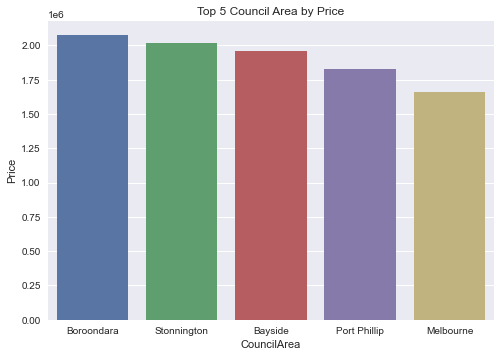

In [95]:
top5_council = df_price_high.groupby('CouncilArea').mean().sort_values(by='Price', ascending=False).head()
sns.barplot(x=top5_council.index, y=top5_council.Price)
plt.title('Top 5 Council Area by Price')
plt.xlabel('CouncilArea')
plt.ylabel('Price')
plt.show()

#### Tipe properti yang memiliki rata2 harga rumah tertinggi

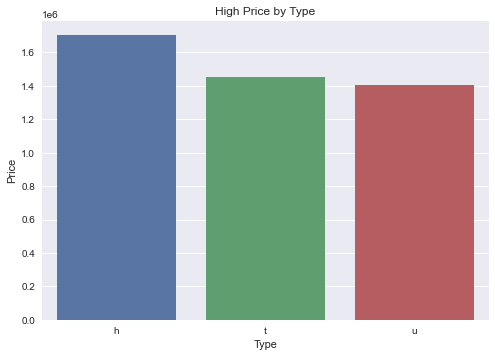

In [80]:
type_high = df_price_high.groupby('Type').agg('mean').Price.sort_values(ascending=False)
sns.barplot(x=type_high.index, y=type_high)
plt.title('High Price by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

#### Method yang paling sering dilakukan

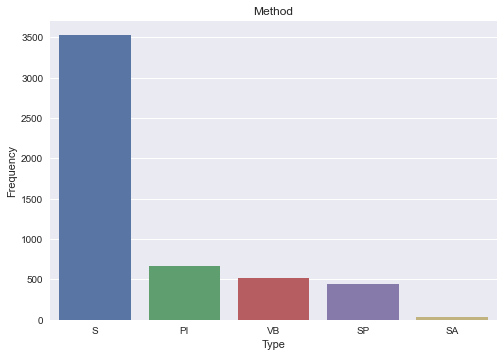

In [82]:
method = df_price_high.groupby('Method').agg('count').Price.sort_values(ascending=False)
sns.barplot(x=method.index, y=method)
plt.title('Method')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

In [96]:
df.Price.mean()

1075684.079455081